## Introduction

The goal of this project is to analyze biodiversity data from the National Parks Service, focusing on the conservation statuses of various species observed in different national parks. This analysis aims to identify trends, patterns, and insights related to species endangerment and their distribution across parks.

Throughout the project, data will be scoped, cleaned, analyzed, and visualized to answer key questions about conservation efforts and species health.

The key questions this project seeks to address include:

- What is the distribution of conservation status for animals across different parks?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation statuses significant?
- Which species were spotted the most at each park?

### Scoping

Defining a clear project scope is essential for guiding the analysis process. This project aims to assess species conservation status, explore relationships between species categories and conservation status, along with identify the most frequently observed species in various parks. The provided data includes species information and observation records, which will be prepared and analyzed using methods such as descriptive statistics, visualization, and Chi-Square testing. The evaluation phase will compare results against initial goals, draw conclusions, and suggest areas for improvement.

### Project Goals

The primary objectives of this project are to assess the conservation status of species, determine if species categories and conservation statuses are significantly related, and identify the most frequently observed species within each park.

### Data

The analysis uses two provided datasets: one containing species information, including conservation status, and the other detailing observation records across four national parks. Data preparation includes merging datasets, handling missing values, and ensuring compatibility for analysis.

### Analysis

Various techniques are applied, including descriptive statistics, visualization, and statistical testing (Chi-Square Test), to explore species distribution, conservation status, and their relationships. Additionally, observations are aggregated to identify the most commonly spotted species per park.

### Evaluation

The last part of the project will revisit the initial goals to assess whether the analysis successfully addressed the research questions posed at the outset. This section will also review the key insights gained during the process along with addressing any limitations encountered.

**Data Sources**:
The datasets `Observations.csv` and `Species_info.csv` were provided by Codecademy.com.

**Note**: The data used in this project is inspired by real-world data but is mostly fictional.

## Import Python Modules
First step is importing the primary modules that will be used in this project:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the data
Loading the data sets `species_info.csv` and `observations.csv` is the first step in making the data accessible for analysis.


In [ ]:
species = pd.read_csv('species_info.csv', encoding='utf-8')
observations = pd.read_csv('observations.csv', encoding='utf-8')


## Data Exploration and Cleaning

Once the data is loaded, it’s essential to explore and clean it to ensure it’s in a usable format. This involves:

- **Inspecting the data** to understand its structure, including column names, data types, and overall size.
- **Checking for missing values**, duplicates, or irrelevant information, which can bias or mislead the analysis.
- **Handling missing data** appropriately by either removing or filling it with reasonable values, ensuring the dataset remains representative and reliable.

### Exploring `species_info.csv` data:


In [ ]:
species.head()
species.info()
species.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


The `species_info.csv` contains information on the different species in the National Parks. There are **5,824** rows and **4** columns and the columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

It is apparent that `conservation_status` only has 191 entries (meaning 5633 missing values).

In [ ]:
species.fillna({'conservation_status': 'No Special Status'}, inplace=True)
species['conservation_status'].value_counts()


conservation_status
No Special Status     5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

In most cases `NaN` values must be treated carefully, but the absence of data here most likely means that these species are not under any conservation status. I will therefore replace all `NaN` values in that column with the label `No Special Status`.

The now updated `conservation_status`columns are:
- **No Special Status**
- **Species of Concern**
- **Endangered**
- **Threatened**
- **In Recovery**

### Exploring `observations.csv` data:

In [ ]:
observations.head()
observations.info()
observations.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


The `observations.csv` holds information from recorded sightings of different species at several national parks for the past 7 days. The columns in the data set include:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

## Analysis

This section analyzes the data following initial exploration, aiming to extract meaningful insights to address key questions:

- ***Conservation Status Distribution*** - Identifying trends in conservation and categories needing attention.
- ***Endangerment Likelihood by Species Type*** - Determining if certain species types are more prone to endangerment.
- ***Statistical Testing*** - Validating findings to ensure observed patterns are statistically significant.
- ***Most Commonly Spotted Species*** - Identifying frequently observed species to assess abundance and resilience.

In [ ]:
merged_df = pd.merge(species, observations, on='scientific_name')
merged_df.head()


,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Special Status,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Special Status,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Special Status,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Special Status,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",No Special Status,Yosemite National Park,128


Merging the two data sets combines relevant information from `species` and `observarions` into one comprehensive table, which enables more meaningful analysis.

In [44]:
conservation_distribution = merged_df['conservation_status'].value_counts()
print(conservation_distribution)


conservation_status
No Special Status     24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: count, dtype: int64


Since the two datasets (`species`and `observations`) now are merged, the `value_counts` function will include both species and the additional context of where and how often those species were observed.

Before the merge, the `value_counts` for `species` was focused solely on the conservation statuses of species without considering their observations or parks.

In [ ]:
park_status_distribution = merged_df.groupby(['park_name', 'conservation_status']).size().reset_index(name='species_count')
print(park_status_distribution)


                              park_name conservation_status  species_count
0                   Bryce National Park          Endangered             20
1                   Bryce National Park         In Recovery              6
2                   Bryce National Park   No Special Status           6188
3                   Bryce National Park  Species of Concern            183
4                   Bryce National Park          Threatened             11
5   Great Smoky Mountains National Park          Endangered             20
6   Great Smoky Mountains National Park         In Recovery              6
7   Great Smoky Mountains National Park   No Special Status           6188
8   Great Smoky Mountains National Park  Species of Concern            183
9   Great Smoky Mountains National Park          Threatened             11
10            Yellowstone National Park          Endangered             20
11            Yellowstone National Park         In Recovery              6
12            Yellowstone

Since the majority of species are categorized as having `No Special Status`, meaning they are not considered to be under immediate threat, the following chart focuses only on species within conservation statuses that require intervention. By excluding `No Special Status`, we can better understand the distribution of species that are at risk and need attention.”

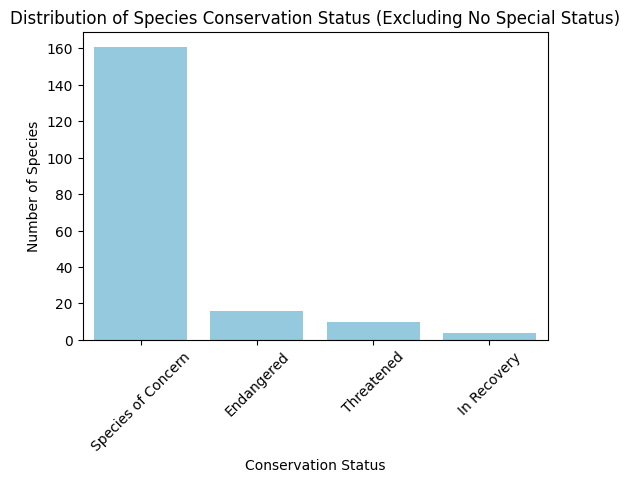

<Figure size 640x480 with 0 Axes>

In [ ]:
filtered_species = species[species['conservation_status'] != 'No Special Status']

plt.figure(figsize=(6,4))
sns.countplot(x='conservation_status', data=filtered_species, color='skyblue')
plt.title('Distribution of Species Conservation Status (Excluding No Special Status)')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)

plt.show()


### Are certain types of species more likely to be endangered?

This analysis also aims to identify which categories of species (e.g., mammals, birds) are more likely to be endangered compared to others. It will help highlighting which species need the most conservation attention.

In [ ]:
category_status = species.groupby(['category', 'conservation_status']).size().unstack(fill_value=0)
category_status


conservation_status,Endangered,In Recovery,No Special Status,Species of Concern,Threatened
category,,,,,
Amphibian,1,0,73,4,2
Bird,4,3,442,72,0
Fish,3,0,116,4,4
Mammal,7,1,176,28,2
Nonvascular Plant,0,0,328,5,0
Reptile,0,0,74,5,0
Vascular Plant,1,0,4424,43,2


By grouping the `species` data by both `category` and `conservation_status`, the summary table shows the count of species for each conservation status (e.g., Endangered, Threatened, etc.) within each species category.

In [ ]:
category_status['Endangered Proportion'] = category_status['Endangered'] / category_status.sum(axis=1)
category_status[['Endangered Proportion']].sort_values(by='Endangered Proportion', ascending=False)


conservation_status,Endangered Proportion
category,
Mammal,0.032213
Fish,0.023187
Amphibian,0.012306
Bird,0.007666
Vascular Plant,0.000224
Nonvascular Plant,0.000000
Reptile,0.000000


`category_status` displays the proportion of endangered species within each species category, helping to compare the conservation urgency across different categories.

In [ ]:
total_species_count = species.groupby('category').size()
category_endangered_count = category_status['Endangered Proportion'] * total_species_count
category_endangered_count_sorted = category_endangered_count.sort_values(ascending=False)
category_endangered_count_sorted


category
Mammal               7.0
Bird                 4.0
Fish                 3.0
Amphibian            1.0
Vascular Plant       1.0
Nonvascular Plant    0.0
Reptile              0.0
dtype: float64

Next step is to calculate the total number of species in each category, followed by estimating the number of endangered species by multiplying the proportion of endangered species (from our earlier analysis) by the total species count in each category. This provides a clear view of where the most endangered species are concentrated across different categories.

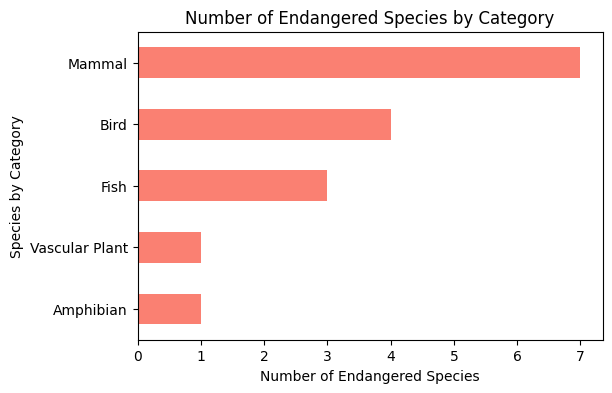

<Figure size 640x480 with 0 Axes>

In [ ]:
category_endangered_count = species[species['conservation_status'] == 'Endangered'].groupby('category').size()

plt.figure(figsize=(6,4))
category_endangered_count.sort_values().plot(kind='barh', color='salmon')

plt.title('Number of Endangered Species by Category')
plt.xlabel('Number of Endangered Species')
plt.ylabel('Species by Category')

plt.show()


### Are the differences between species and their conservation statuses significant?

To answer this I created a contingency table that shows the relationship between categories of species and their conservation status. The following steps performs a Chi-Square Test to determine whether there is a significant relationship between these two variables.

In [128]:
contingency_table = pd.crosstab(species['category'], species['conservation_status'])
contingency_table

conservation_status,Endangered,In Recovery,No Special Status,Species of Concern,Threatened
category,,,,,
Amphibian,1,0,73,4,2
Bird,4,3,442,72,0
Fish,3,0,116,4,4
Mammal,7,1,176,28,2
Nonvascular Plant,0,0,328,5,0
Reptile,0,0,74,5,0
Vascular Plant,1,0,4424,43,2


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(species['category'], species['conservation_status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test p-value: {p}")

if p < 0.05:
    print("There is a significant relationship between species category and conservation status.")
else:
    print("There is no significant relationship between species category and conservation status.")


Chi-Square Test p-value: 2.455142316599019e-117
There is a significant relationship between species category and conservation status.


The test confirms a significant relationship between species `category` and `conservation_status`, suggesting that some species categories are more likely to face conservation challenges than others.

### Which species were spotted the most at each park?

To identify the most observed species across various national parks, the first step is to aggregate the data by park name and species, followed by summing the number of observations for each species within each park. The data is then sorted by the number of observations in descending order, so the species with the highest count for each park are listed first. Finally, the top species for each park was selected  by taking the first entry after sorting.

In [ ]:
species_per_park = merged_df.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()

most_spotted_species = species_per_park.sort_values(['park_name', 'observations'], ascending=[True, False])

top_species_per_park = most_spotted_species.groupby('park_name').head(1)

print(top_species_per_park.to_string())





                                 park_name        scientific_name  observations
1359                   Bryce National Park          Columba livia          1017
10534  Great Smoky Mountains National Park  Streptopelia decaocto           768
13534            Yellowstone National Park         Holcus lanatus          2415
19178               Yosemite National Park   Hypochaeris radicata          1515


### Observations

The table shows the most frequently observed species within each of the four national parks in the dataset. The species with the highest number of recorded observations for each park are as follows:

- **Bryce National Park** - Columba livia (Pigeon) with **1,017** observations.
- **Great Smoky Mountains National Park** - Streptopelia decaocto (Eurasian Collared-Dove) with **768** observations.
- **Yellowstone National Park** - Holcus lanatus (Common Velvet Grass) with **2,415** observations.
- **Yosemite National Park** - Hypochaeris radicata (Hairy Cat's Ear) with **1,515** observations.

These species are primarily birds and plants, indicating they are either commonly found or highly monitored in their respective parks. The higher counts might also suggest they are particularly abundant or easy to observe.

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for animals across different parks?
    - The vast majority of species were not part of conservation (5,633 vs 191).
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation statuses significant?
    - ***Yes***, the Chi-Square Test results indicated that there is a significant relationship between species category and conservation status.
- Which species were spotted the most at each park?
    - ***Columba livia*** (Pigeon) for Bryce National Park, ***Streptopelia decaocto*** (Eurasian Collared-Dove) for Great Smoky Mountains National Park, ***Holcus lanatus*** (Common Velvet Grass) for Yellowstone National Park and ***Hypochaeris radicata*** (Hairy Cat's Ear) for Yosemite National Park.

## Further Research 

The dataset only covers observations from the past 7 days, limiting the ability to analyze trends and changes over time. It would be valuable to explore how the conservation status of different species evolves over a longer period. Additionally, the area size of each park is not included in the dataset, but it’s likely that larger parks, such as Yellowstone, would have more observations and a greater variety of species. Finally, if more detailed location data were available, it would allow for an analysis of the spatial distribution of species, potentially revealing if the observations are clustered in specific areas.